In [2]:
import pandas as pd
import numpy as np

from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold
from lightgbm import LGBMClassifier
import matplotlib.pyplot as plt # for plotting
#import seaborn as sns
#color = sns.color_palette()
#sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')
from tqdm import tqdm_notebook as tqdm
import gc
gc.enable()

In [3]:
bureau = pd.read_csv('./input/bureau.csv')

In [4]:
groupby = bureau.groupby(by=['SK_ID_CURR'])

In [5]:
len(groupby)

305811

In [3]:
features = pd.DataFrame({'SK_ID_CURR': bureau['SK_ID_CURR'].unique()})

groupby = bureau.groupby(by=['SK_ID_CURR'])

g = groupby['DAYS_CREDIT'].agg('count').reset_index()
g.rename(index=str, columns={'DAYS_CREDIT': 'bureau_number_of_past_loans'}, inplace=True)
features = features.merge(g, on=['SK_ID_CURR'], how='left')

In [7]:
g.head()

,SK_ID_CURR,bureau_number_of_past_loans
0,100001,7
1,100002,8
2,100003,4
3,100004,2
4,100005,3


In [9]:
bureau.groupby('SK_ID_CURR').size().head()

SK_ID_CURR
100001    7
100002    8
100003    4
100004    2
100005    3
dtype: int64

In [3]:
all_data = pd.concat((data, test)).reset_index(drop=True)

In [8]:
all_data[groupby_aggregate_names].head()

,CODE_GENDER_NAME_EDUCATION_TYPE_max_AMT_ANNUITY,CODE_GENDER_NAME_EDUCATION_TYPE_max_AMT_CREDIT,CODE_GENDER_NAME_EDUCATION_TYPE_mean_EXT_SOURCE_1,CODE_GENDER_NAME_EDUCATION_TYPE_mean_EXT_SOURCE_2,CODE_GENDER_NAME_EDUCATION_TYPE_max_OWN_CAR_AGE,CODE_GENDER_NAME_EDUCATION_TYPE_sum_OWN_CAR_AGE
0,177696.0,2961000.0,0.387190,0.496567,91.0,597967.0
1,230161.5,4050000.0,0.576448,0.555568,65.0,200587.0
2,177696.0,2961000.0,0.387190,0.496567,91.0,597967.0
3,216589.5,4027680.0,0.534830,0.504794,65.0,403840.0
4,177696.0,2961000.0,0.387190,0.496567,91.0,597967.0


In [4]:
all_data['PAYMENT_RATE'] = all_data['AMT_CREDIT'] / all_data['AMT_ANNUITY']

In [5]:
all_data['PAYMENT_RATE_SQRT'] = all_data['PAYMENT_RATE'].apply('sqrt')

In [6]:
all_data['PAYMENT_RATE_SQURE'] = all_data['PAYMENT_RATE']**2

In [7]:
data = all_data[:data.shape[0]]

In [14]:
corr1 = data.corr()

In [15]:
corr1['TARGET'].sort_values(ascending=False)

TARGET                         1.000000
DAYS_BIRTH                     0.078239
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
DAYS_LAST_PHONE_CHANGE         0.055218
DAYS_ID_PUBLISH                0.051457
REG_CITY_NOT_WORK_CITY         0.050994
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_DOCUMENT_3                0.044346
DAYS_REGISTRATION              0.041975
OWN_CAR_AGE                    0.037612
LIVE_CITY_NOT_WORK_CITY        0.032518
DEF_30_CNT_SOCIAL_CIRCLE       0.032248
DEF_60_CNT_SOCIAL_CIRCLE       0.031276
FLAG_WORK_PHONE                0.028524
AMT_REQ_CREDIT_BUREAU_YEAR     0.019930
CNT_CHILDREN                   0.019187
CNT_FAM_MEMBERS                0.009308
OBS_30_CNT_SOCIAL_CIRCLE       0.009131
OBS_60_CNT_SOCIAL_CIRCLE       0.009022
REG_REGION_NOT_WORK_REGION     0.006942
REG_REGION_NOT_LIVE_REGION     0.005576
FLAG_DOCUMENT_2                0.005417
FLAG_DOCUMENT_21               0.003709


In [4]:
all_data['MEAN_BUILDING_SCORE_AVG'] = all_data.iloc[:, 44:58].mean(skipna=True, axis=1)

In [13]:
all_data['DEF_OBS_PERC'] = all_data['OBS_30_CNT_SOCIAL_CIRCLE'] / all_data['DEF_30_CNT_SOCIAL_CIRCLE']

In [14]:
all_data['DEF_OBS_PERC']

0          1.000000
1               inf
2               NaN
3               inf
4               NaN
5               NaN
6               inf
7               inf
8               inf
9               inf
10              NaN
11              NaN
12              NaN
13              NaN
14              NaN
15              NaN
16              NaN
17              inf
18              inf
19              NaN
20              NaN
21              NaN
22              NaN
23              NaN
24         1.000000
25              NaN
26        10.000000
27              inf
28              NaN
29              NaN
            ...    
356225     2.000000
356226          inf
356227          inf
356228          NaN
356229          inf
356230          inf
356231          NaN
356232          inf
356233          inf
356234          inf
356235          NaN
356236          NaN
356237          NaN
356238          NaN
356239          inf
356240          NaN
356241          NaN
356242          NaN
356243          NaN


In [24]:
AMT_REQ_CREDIT_BUREAU_SUM = all_data['AMT_REQ_CREDIT_BUREAU_HOUR'] + all_data['AMT_REQ_CREDIT_BUREAU_WEEK']+all_data['AMT_REQ_CREDIT_BUREAU_DAY']+all_data['AMT_REQ_CREDIT_BUREAU_MON']+all_data['AMT_REQ_CREDIT_BUREAU_QRT']+all_data['AMT_REQ_CREDIT_BUREAU_YEAR']

In [8]:
all_data['DAYS_ID_PUBLISH'].mode()

0   -4291
dtype: int64

In [16]:
bureau = pd.read_csv('./input/bureau.csv')

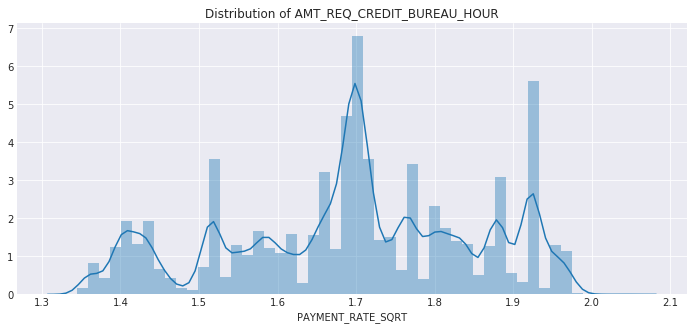

In [20]:
plt.figure(figsize=(12,5))
plt.title("Distribution of AMT_REQ_CREDIT_BUREAU_HOUR")
ax1 = sns.distplot(np.log1p(all_data['PAYMENT_RATE_SQRT'].dropna()))

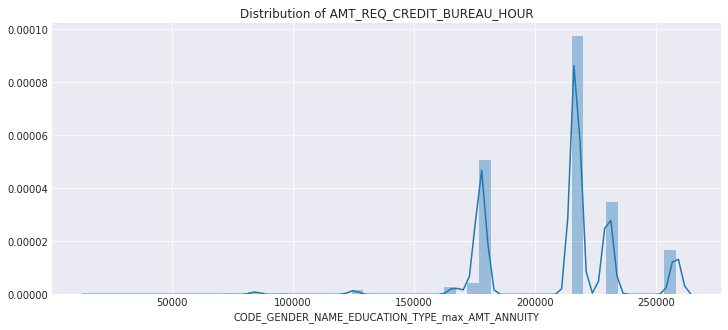

In [9]:
plt.figure(figsize=(12,5))
plt.title("Distribution of AMT_REQ_CREDIT_BUREAU_HOUR")
ax1 = sns.distplot(all_data['CODE_GENDER_NAME_EDUCATION_TYPE_max_AMT_ANNUITY'].dropna())

In [5]:
grp = bureau[['SK_ID_CURR', 'CREDIT_TYPE']].groupby(by = ['SK_ID_CURR'])['CREDIT_TYPE'].nunique().reset_index().rename(index=str, columns={'CREDIT_TYPE': 'BUREAU_LOAN_TYPES'})

In [9]:
bureau['TYPE_COUNT'] = bureau[['SK_ID_CURR', 'CREDIT_TYPE']].groupby('SK_ID_CURR')['CREDIT_TYPE'].nunique()

In [52]:
bureau_agg = bureau.groupby('SK_ID_CURR').agg('mean')
bureau_agg['BURO_COUNT'] = bureau.groupby('SK_ID_CURR').size()
bureau_agg['TYPE_COUNT'] = bureau[['SK_ID_CURR', 'CREDIT_TYPE']].groupby('SK_ID_CURR')['CREDIT_TYPE'].nunique()


In [53]:
bureau_agg.head()

,SK_ID_BUREAU,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,AMT_ANNUITY,TYPE_COUNT,BURO_COUNT
SK_ID_CURR,,,,,,,,,,,,,,,
100001,5896633.000,-735.000000,0.0,82.428571,-825.500000,NaN,0.0,207623.571429,85240.928571,0.00000,0.0,-93.142857,3545.357143,1,7
100002,6153272.125,-874.000000,0.0,-349.000000,-697.500000,1681.029,0.0,108131.945625,49156.200000,7997.14125,0.0,-499.875000,0.000000,2,8
100003,5885878.500,-1400.750000,0.0,-544.500000,-1097.333333,0.000,0.0,254350.125000,0.000000,202500.00000,0.0,-816.000000,NaN,2,4
100004,6829133.500,-867.000000,0.0,-488.500000,-532.500000,0.000,0.0,94518.900000,0.000000,0.00000,0.0,-532.000000,NaN,1,2
100005,6735201.000,-190.666667,0.0,439.333333,-123.000000,0.000,0.0,219042.000000,189469.500000,0.00000,0.0,-54.333333,1420.500000,2,3


In [28]:
bureau_agg['AVERAGE_LOAN_TYPE'] = bureau_agg['BURO_COUNT'] / bureau_agg['TYPE_COUNT'] 

In [29]:
bureau_agg['AVERAGE_LOAN_TYPE']

SK_ID_CURR
100001     7.000000
100002     4.000000
100003     2.000000
100004     2.000000
100005     1.500000
100007     1.000000
100008     3.000000
100009     9.000000
100010     1.000000
100011     2.000000
100013     2.000000
100014     8.000000
100015     4.000000
100016     3.500000
100017     3.000000
100019     1.000000
100020     4.000000
100022     2.000000
100023     6.500000
100025     1.000000
100026     1.500000
100027     3.000000
100028     6.000000
100029     2.000000
100030     3.000000
100031     3.500000
100032     4.000000
100033     1.000000
100035     4.500000
100036     1.000000
            ...    
456220     2.500000
456221     1.666667
456223     1.666667
456224     8.500000
456225     4.500000
456226     2.000000
456227     2.000000
456229     1.000000
456230     6.000000
456231     7.000000
456232     1.000000
456233     1.000000
456234     5.000000
456235     1.500000
456236     4.333333
456237     1.000000
456238     3.000000
456239     3.666667
456240   

In [57]:
grp = bureau[['SK_ID_CURR', 'DAYS_CREDIT']].groupby('SK_ID_CURR')

In [58]:
grp = grp.apply(lambda x: x.sort_values(['DAYS_CREDIT'], ascending = False))

In [60]:
grp = grp.reset_index(drop = True)

In [62]:
grp['DAYS_CREDIT1'] = grp['DAYS_CREDIT']*-1
grp['DAYS_DIFF'] = grp.groupby('SK_ID_CURR')['DAYS_CREDIT1'].diff()

In [63]:
del grp['DAYS_CREDIT1'], grp['DAYS_CREDIT']
gc.collect()

21

In [64]:
grp.groupby('SK_ID_CURR').mean()

,DAYS_DIFF
SK_ID_CURR,
100001,253.833333
100002,190.571429
100003,660.000000
100004,918.000000
100005,155.500000
100007,NaN
100008,509.500000
100009,155.470588
100010,1603.000000


In [54]:
bureau_agg = bureau_agg.reset_index()

In [50]:
bureau_agg = bureau_agg.merge(grp1,how='left',on='SK_ID_CURR')

In [51]:
bureau_agg

,SK_ID_CURR,SK_ID_BUREAU,DAYS_CREDIT_x,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,AMT_ANNUITY,TYPE_COUNT,BURO_COUNT,AVERAGE_LOAN_TYPE,DAYS_CREDIT_y,DAYS_CREDIT1,DAYS_DIFF
0,100001,5.896633e+06,-735.000000,0.0,82.428571,-825.500000,NaN,0.000000,2.076236e+05,85240.928571,0.00000,0.0,-93.142857,3545.357143,1,7,7.000000,-49,49,0
1,100001,5.896633e+06,-735.000000,0.0,82.428571,-825.500000,NaN,0.000000,2.076236e+05,85240.928571,0.00000,0.0,-93.142857,3545.357143,1,7,7.000000,-320,320,271
2,100001,5.896633e+06,-735.000000,0.0,82.428571,-825.500000,NaN,0.000000,2.076236e+05,85240.928571,0.00000,0.0,-93.142857,3545.357143,1,7,7.000000,-559,559,239
3,100001,5.896633e+06,-735.000000,0.0,82.428571,-825.500000,NaN,0.000000,2.076236e+05,85240.928571,0.00000,0.0,-93.142857,3545.357143,1,7,7.000000,-857,857,298
4,100001,5.896633e+06,-735.000000,0.0,82.428571,-825.500000,NaN,0.000000,2.076236e+05,85240.928571,0.00000,0.0,-93.142857,3545.357143,1,7,7.000000,-879,879,22
5,100001,5.896633e+06,-735.000000,0.0,82.428571,-825.500000,NaN,0.000000,2.076236e+05,85240.928571,0.00000,0.0,-93.142857,3545.357143,1,7,7.000000,-909,909,30
6,100001,5.896633e+06,-735.000000,0.0,82.428571,-825.500000,NaN,0.000000,2.076236e+05,85240.928571,0.00000,0.0,-93.142857,3545.357143,1,7,7.000000,-1572,1572,663
7,100002,6.153272e+06,-874.000000,0.0,-349.000000,-697.500000,1681.029,0.000000,1.081319e+05,49156.200000,7997.14125,0.0,-499.875000,0.000000,2,8,4.000000,-103,103,0
8,100002,6.153272e+06,-874.000000,0.0,-349.000000,-697.500000,1681.029,0.000000,1.081319e+05,49156.200000,7997.14125,0.0,-499.875000,0.000000,2,8,4.000000,-476,476,373
9,100002,6.153272e+06,-874.000000,0.0,-349.000000,-697.500000,1681.029,0.000000,1.081319e+05,49156.200000,7997.14125,0.0,-499.875000,0.000000,2,8,4.000000,-645,645,169


In [9]:
import pandas as pd
import  numpy as np

df = pd.DataFrame({'key1':list('aabba'),
                  'key2': ['one','two','one','two','one'],
                  'data1': ['1','3','5','7','9'],
                  'data2': ['2','4','6','8','10']})
print (df)

  data1 data2 key1 key2
0     1     2    a  one
1     3     4    a  two
2     5     6    b  one
3     7     8    b  two
4     9    10    a  one


In [10]:
len(df.groupby(['key1']))

2

In [11]:
 for i, (index, df) in enumerate(df.groupby(['key1'])):
        print i,index,df

SyntaxError: Missing parentheses in call to 'print' (<ipython-input-11-aaba6c5082dc>, line 2)

In [13]:
df.groupby(['key1']).ngroups

2

In [6]:
def chunk_groups(groupby_object, chunk_size):
    n_groups = groupby_object.ngroups
    group_chunk, index_chunk = [], []
    for i, (index, df) in enumerate(groupby_object):
        group_chunk.append(df)
        index_chunk.append(index)

        if (i + 1) % chunk_size == 0 or i + 1 == n_groups:
            group_chunk_, index_chunk_ = group_chunk.copy(), index_chunk.copy()
            group_chunk, index_chunk = [], []
            yield index_chunk_, group_chunk_

In [7]:
for index_chunk, groups_chunk in tqdm(chunk_groups(groupby, 100000), total=4):
    continue